In [1]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('adult.data', header = None, names = col_names)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## How many males and females are there?

In [3]:
df.groupby(['sex']).count()['age']

sex
 Female    10771
 Male      21790
Name: age, dtype: int64

## What is the mean male age?

In [4]:
df.loc[df['sex'] == ' Male']['age'].mean()

39.43354749885268

## What is the proportion of the US citizens?

In [5]:
df.loc[df['native-country'] == ' United-States'].shape[0] / df.shape[0]

0.895857006848684

## Plot the distribution of people’s education as a bar plot

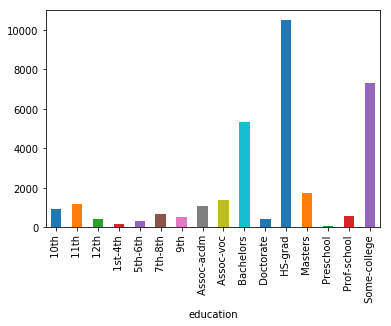

In [6]:
df.groupby('education').size().plot(kind = 'bar')

## What is the mean and standard deviation of the ”final weight” for divorced people?

In [7]:
df.loc[df['marital-status'] == ' Divorced']['fnlwgt'].agg(['mean', 'std'])

mean    185802.790457
std     105646.789459
Name: fnlwgt, dtype: float64

## Is it true that the people who receive over 50k are mostly highly educated?

In [8]:
df.loc[(df['income'] == ' >50K') & (df['education-num'] > 12)]['income'].count() / df.loc[df['education-num'] > 12]['income'].count() > 0.5

False

## What is the maximum male and female age for each race?

In [9]:
df.groupby(['race', 'sex'])['age'].agg(['max', 'min'])

max  min
race                sex              
 Amer-Indian-Eskimo  Female   80   17
                     Male     82   17
 Asian-Pac-Islander  Female   75   17
                     Male     90   18
 Black               Female   90   17
                     Male     90   17
 Other               Female   74   17
                     Male     77   17
 White               Female   90   17
                     Male     90   17

## The people from which countries work as farmers/fishers?

In [10]:
pd.Series(df.loc[df['occupation'] == ' Farming-fishing']['native-country'].unique())

0      United-States
1           Cambodia
2             Poland
3          Guatemala
4             Mexico
5            England
6                  ?
7        Philippines
8              Italy
9        Puerto-Rico
10           Vietnam
11           Germany
12             Japan
13            Canada
14        Yugoslavia
15              Cuba
16          Portugal
17       El-Salvador
18              Hong
19           Ireland
20            France
dtype: object

## Consider  the  ratio  of  the  number  of  1)  male  bachelors  to  male  masters,  and  2)  female bachelors to female masters.  Which one is higher?

In [11]:
ratio_df = df[['sex', 'education']].loc[df['education'] == ' Bachelors'].groupby(['sex']).count() / df[['sex', 'education']].loc[df['education'] == ' Masters'].groupby(['sex']).count()
print(ratio_df)

         education
sex               
 Female   3.020522
 Male     3.147430


In [12]:
ratio_df['education'][' Male'] 
print('\nratio for male is higher:\n{}'.format(ratio_df['education'][' Male'] > ratio_df['education'][' Female'] ))


ratio for male is higher:
True


## What is the largest number of hours a person works a week?  How many people who work this number of hours are there?  What is their income?

In [13]:
df['hours-per-week'].max()

99

In [14]:
df.loc[df['hours-per-week'] == df['hours-per-week'].max()]['hours-per-week'].count()

85

In [15]:
df.loc[df['hours-per-week'] == df['hours-per-week'].max()].groupby(['income'])['income'].count()

income
 <=50K    60
 >50K     25
Name: income, dtype: int64